In [32]:
from typing import TypedDict
from typing import Annotated 
from langgraph.graph import START,END
from langgraph.graph.message import add_messages
from langgraph.graph.state import StateGraph
from langchain_core.tools import tool
from langchain_core.messages import BaseMessage
from langgraph.prebuilt import tools_condition

from langgraph.prebuilt import ToolNode
import os
from dotenv import load_dotenv
load_dotenv()

True

In [15]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGSMITH_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGSMITH_TRACING"]="true"

In [17]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="deepseek-r1-distill-llama-70b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2,
)

In [25]:
class Agentstate(TypedDict):
  messages: Annotated[list[BaseMessage],add_messages]

In [28]:

from langchain_core.tools import tool
@tool
def add_numbers(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b

tools = [add_numbers]

In [29]:
llm_with_tools = llm.bind_tools(tools)

In [26]:
def chat(state:Agentstate)->Agentstate:
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [36]:
graph=StateGraph(Agentstate)
graph.add_node("chat",chat)
graph.add_node("tools",ToolNode([add_numbers]))

graph.add_conditional_edges(
    "chat",
    tools_condition,
)

graph.add_edge(START,"chat")
graph.add_edge("tools",END)
agent=graph.compile()


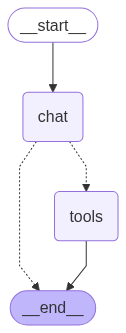

In [37]:
from IPython.display import Image,display
display(Image(agent.get_graph().draw_mermaid_png()))

In [38]:
response=agent.invoke({"messages":"What is agentic AI"})

In [ ]:
response["messages"][-1].content

'Agentic AI refers to artificial intelligence systems designed to act autonomously, capable of making decisions and taking actions without direct human intervention. These systems typically possess advanced functionalities in perception, reasoning, and execution, enabling them to operate independently in dynamic environments. They are distinguished by their ability to function beyond predefined rules, adapting and learning to achieve goals proactively. Applications range from robotics and personal assistants to self-driving cars, emphasizing autonomy and self-sufficiency. Key considerations include ensuring alignment with human values, safety, and accountability for decision-making outcomes.'

In [42]:
response=agent.invoke({"messages":"What is 2+2?"})
response["messages"][-1].content

'4'